<a href="https://colab.research.google.com/github/kushalarora6/topsisfortextgeneration/blob/main/topsis2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy pandas matplotlib

In [2]:
import pandas as pd

# Define the criteria
criteria = ['Accuracy', 'Training Time', 'Model Size', 'Inference Speed', 'Diversity Score']

# Define the models and their performance metrics
data = {
    'Model': ['GPT-2', 'GPT-3', 'T5', 'BART', 'MarianMT', 'mBART'],
    'Accuracy': [0.75, 0.85, 0.78, 0.80, 0.76, 0.79],
    'Training Time': [120, 300, 150, 180, 100, 200],  # in seconds
    'Model Size': [500, 1750, 600, 700, 300, 800],  # in MB
    'Inference Speed': [30, 50, 40, 35, 25, 45],  # in ms
    'Diversity Score': [0.85, 0.90, 0.80, 0.88, 0.82, 0.84]
}

df = pd.DataFrame(data)

In [3]:
# Normalize the data
normalized_df = df.copy()
for column in criteria[1:]:  # Skip the 'Model' column
    normalized_df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())

In [4]:
# Define weights for each criterion
weights = {
    'Accuracy': 0.4,
    'Training Time': 0.2,
    'Model Size': 0.1,
    'Inference Speed': 0.2,
    'Diversity Score': 0.1
}

In [5]:
# Calculate ideal and negative ideal solutions
ideal_solution = normalized_df[criteria[1:]].max()
negative_ideal_solution = normalized_df[criteria[1:]].min()

In [6]:
import numpy as np

# Calculate distances
def calculate_distances(row):
    d_star = np.sqrt(((row[criteria[1:]] - ideal_solution) ** 2).sum())
    d_minus = np.sqrt(((row[criteria[1:]] - negative_ideal_solution) ** 2).sum())
    return pd.Series([d_star, d_minus])

normalized_df[['D_star', 'D_minus']] = normalized_df.apply(calculate_distances, axis=1)

In [8]:
# Calculate relative closeness
normalized_df['C'] = normalized_df['D_minus'] / (normalized_df['D_star'] + normalized_df['D_minus'])

# Rank the models
normalized_df['Rank'] = normalized_df['C'].rank(ascending=False)

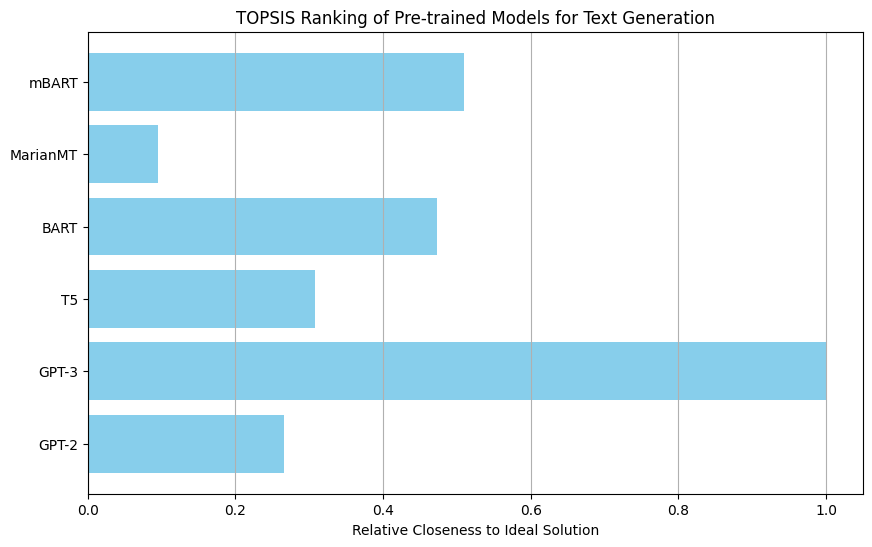

In [9]:
import matplotlib.pyplot as plt

# Plotting the results
plt.figure(figsize=(10, 6))
plt.barh(normalized_df['Model'], normalized_df['C'], color='skyblue')
plt.xlabel('Relative Closeness to Ideal Solution')
plt.title('TOPSIS Ranking of Pre-trained Models for Text Generation')
plt.grid(axis='x')
plt.show()